**Pre-Lecture HW**

ChatGPT Session Logs: https://chatgpt.com/share/66f606b8-6400-8003-a30e-fb34f25ed5db

Question #1: 

In [2]:
!pip install plotly

In [5]:
!pip install palmerpenguins

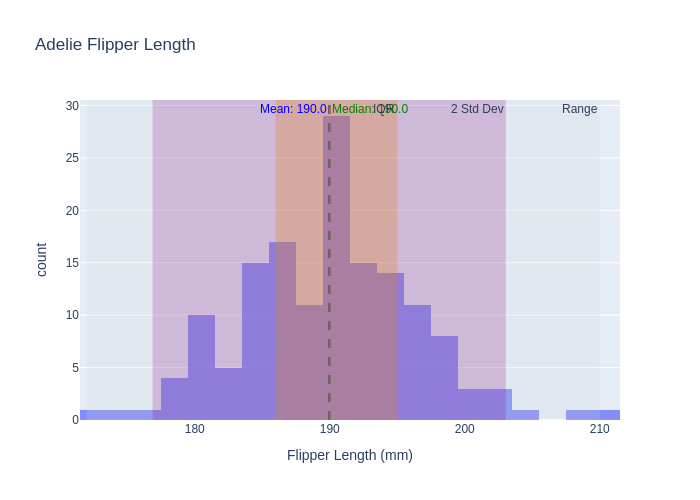

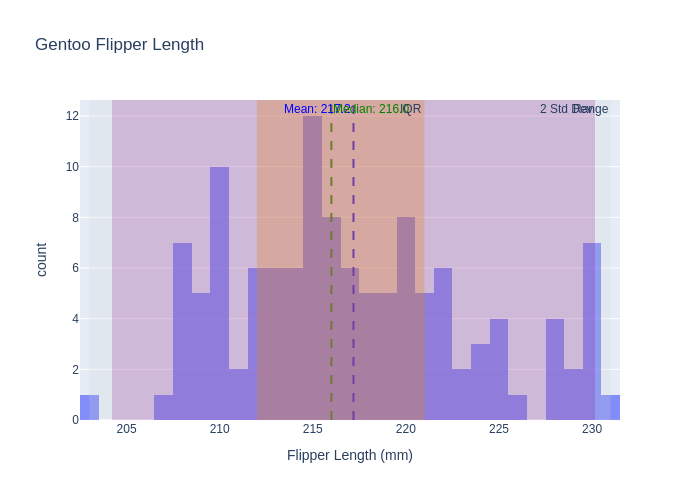

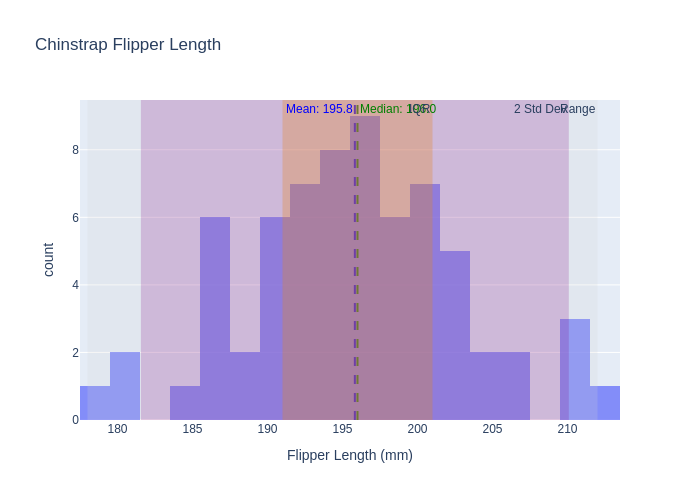

In [43]:
import plotly.express as px
import plotly.graph_objects as go
from palmerpenguins import load_penguins
import numpy as np
import pandas as pd

# Load the PalmerPenguins dataset
penguins = load_penguins()

# Drop rows with missing flipper_length_mm values
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Function to add lines and rectangles for statistics
def add_stats(fig, species_data, species_name):
    flipper_length = species_data['flipper_length_mm']

    # Calculate mean, median, range, IQR, and standard deviations
    mean_flipper = flipper_length.mean()
    median_flipper = flipper_length.median()
    min_flipper = flipper_length.min()
    max_flipper = flipper_length.max()
    q1 = flipper_length.quantile(0.25)
    q3 = flipper_length.quantile(0.75)
    iqr = q3 - q1
    std_flipper = flipper_length.std()
    
    # Calculate two standard deviations from the mean
    lower_bound_2std = mean_flipper - 2 * std_flipper
    upper_bound_2std = mean_flipper + 2 * std_flipper
    
    # Add mean and median as vertical lines with colored annotations
    fig.add_vline(x=mean_flipper, line=dict(color='blue', dash='dash'), 
                  annotation_text=f'Mean: {mean_flipper:.1f}', 
                  annotation_position="top left",  # Mean annotation remains on the left
                  annotation=dict(font_size=12, font_color="blue"))  # Blue annotation for mean
    
    fig.add_vline(x=median_flipper, line=dict(color='green', dash='dash'), 
                  annotation_text=f'Median: {median_flipper:.1f}', 
                  annotation_position="top right",  # Median annotation placed to the right of the line
                  annotation=dict(font_size=12, font_color="green"))  # Green annotation for median
    
    # Add range as a rectangle
    fig.add_vrect(x0=min_flipper, x1=max_flipper, fillcolor="lightgrey", opacity=0.2, 
                  annotation_text="Range", line_width=0)
    
    # Add interquartile range (IQR) as a rectangle
    fig.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.3, 
                  annotation_text="IQR", line_width=0)
    
    # Add two standard deviations away from the mean as a rectangle
    fig.add_vrect(x0=lower_bound_2std, x1=upper_bound_2std, fillcolor="purple", opacity=0.2, 
                  annotation_text="2 Std Dev", line_width=0)

# Create histograms for each species and add statistics
for species in penguins['species'].unique():
    species_data = penguins[penguins['species'] == species]
    
    # Create histogram
    fig = px.histogram(species_data, x="flipper_length_mm", nbins=30, title=f'{species} Flipper Length',
                       labels={'flipper_length_mm':'Flipper Length (mm)'}, opacity=0.75)
    
    # Add statistics
    add_stats(fig, species_data, species)
    
    # Show plot for the current species
    fig.show(renderer="png")


NOTE: I am aware that the Gentoo species histogram has "Mean" and "Median" overlapping in titles, but as you will see in the chatlog session, I was not successful in getting ChatGPT to only edit the Gentoo species and leaving the others alone without creating errors in the code. This version of the code is, in my opinion, the best out of what I was able to produce with ChatGPT without getting into a time sink. 

Question #2: Using Seaborn Kernal Density Estimation Plots 

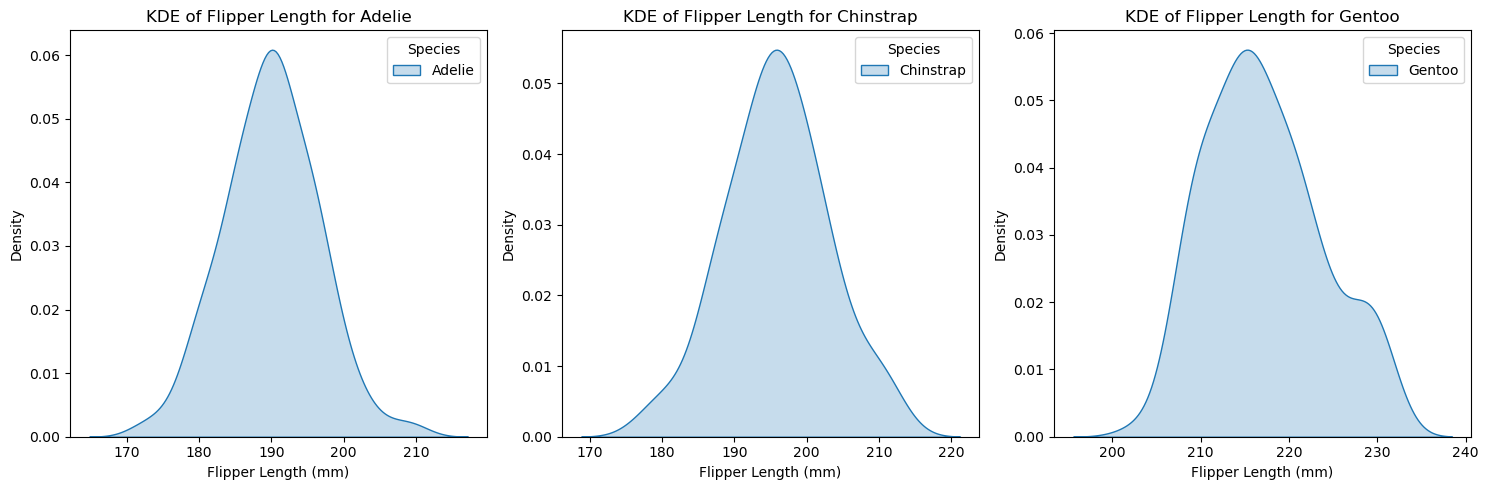

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Palmer Penguins dataset
penguins = sns.load_dataset('penguins')

# Set up the figure for plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create KDE plots for flipper length by species
for i, species in enumerate(penguins['species'].unique()):
    sns.kdeplot(penguins[penguins['species'] == species]['flipper_length_mm'],
                ax=axes[i], fill=True, label=species, legend=False)
    axes[i].set_title(f'KDE of Flipper Length for {species.capitalize()}')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')
    axes[i].legend(title='Species')

plt.tight_layout()
plt.show()


3. 

**Histogram Pros:** It's:
1. simple and intuitive; 
2. good for showing frequency distributions by providing a clear view of how data is distributed within bins; 
3. useful for visualizing spread and skewness. 

**Histogram Cons:** 
1. Bin size sensitivity: Result depends on the choice of bin size, where too few simplifies data, too many complicates it. 
2. Not a smooth representation because histograms can introduce artifacts, making it harder to see underlying patters
3. With few data points, the histogram may give a misleading or overly sparse representation.

**KDEs Pros:**
1. Has a smooth and visually appealing representation with a curve to demonstrate data distribution without artificial binning, giving a clearer sense of the underlying pattern
2. Works well with small data sets where a histogram might not be appropriate
3. Better at showing multiple peaks or modes in the distribution compared to histograms or box plots 

**KDEs Cons:**
1. The smoothing depends on the smoothing parameter (bandwidth), and choosing poorly can oversmooth or undersmooth the data
2. Less intuitive than histograms for those unfamiliar to KDEs
3. KDEs give a probability density, so it might be difficult to grasp exact counts or frequency 

**Box Plots Pros:**
1. Clearly displays the median, quartiles, and potential outliers in a compact visual. 
2. Great for comparing distributions between different groups
3. Outliers are shown explicitly, so they're easy to identify 

**Box Plots Cons:**
1. Do not show distribution shape or multimodality, missing important information that a histogram/KDE would show. 
2. Less useful for unimodal, continuous data. If one is only looking at a single numerical variable, a box plot can oversimplify the data compared to a histogram or KDE. 

**My Opinion on Best Visual Representation**

I believe that the KDEs are the best due to the fact that they are the most versatile: They can represent both unimodality and multimodality, making it more applicable for various datasets. The appearance is a smooth curve that is most oftenly associated with statistics, and can compare distributions across different categories really well. A KDE can sufficiently communicate data in an appealling way, even if that data might be more suited for a histogram or a box plot: It's a middle man that will work for most things. 

4. 
   

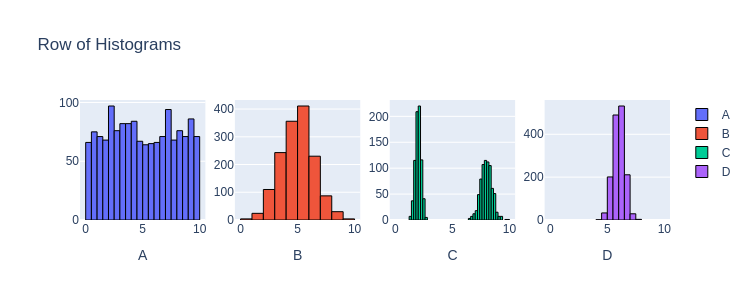

In [40]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

   1. Which datasets have similar means and similar variances?
   
   Dataset 1 and Dataset 3 
         

   2. Which datasets have similar means but quite different variances?
   
   Datasets 1 and 2; Datasets 2 and 3 
   
   
   3. Which datasets have similar variances but quite different means?
   
   Datasets 2 and 4
   
   4. Which datasets have quite different means and quite different variances?
   
   Datasets 3 and 4

In [27]:
mean1 = np.mean(data1)
mean2 = np.mean(data2)
mean3 = np.mean(data3)
mean4 = np.mean(data4)

var1 = np.var(data1)
var2 = np.var(data2)
var3 = np.var(data3)
var4 = np.var(data4)

means = [mean1, mean2, mean3, mean4]
variances = [var1, var2, var3, var4]

for i, (mean, var) in enumerate(zip(means, variances), 1):
    print(f"Dataset {i}: Mean = {mean:.2f}, Variance = {var:.2f}")

Dataset 1: Mean = 5.02, Variance = 8.48
Dataset 2: Mean = 4.96, Variance = 2.31
Dataset 3: Mean = 5.00, Variance = 9.19
Dataset 4: Mean = 5.99, Variance = 0.27


**Post-Lecture Questions**

ChatGPT Session Log: https://chatgpt.com/share/66f61650-14c4-8003-aa9e-c1b7f3ff4e33

5. (Verbal Explanation)

The relationship between mean and median and "right" and "left" skewness is as follows: 

When the distribution is normal, the mean = median. 

When it's skewed to the right, the mean > the median due to the high outliers that pull the mean upwards 

When it's skewed to the left, the mean < median due to the low outliers that pull the mean downwards. 

The mean is most susceptible to high-valued outliers, and the medican is most susceptible to low-valued outliers. 

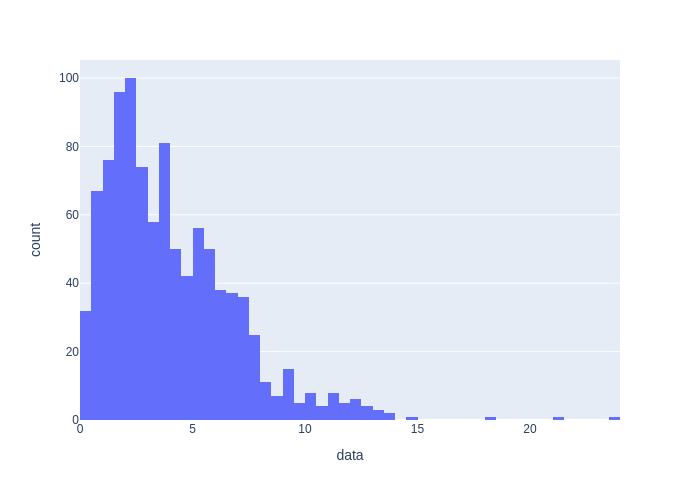

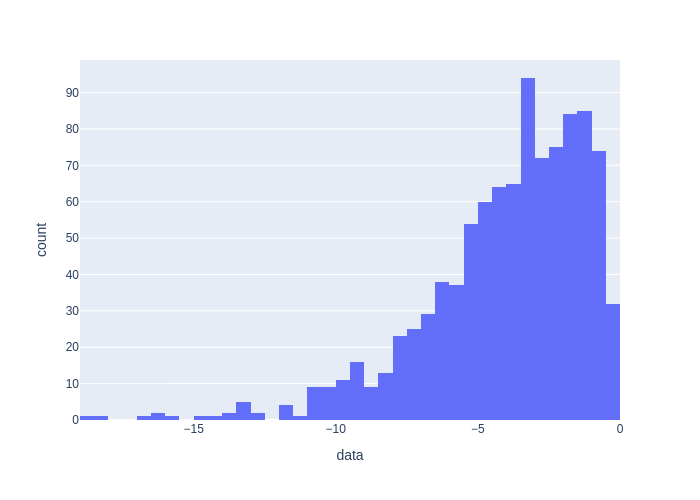

In [33]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000) # Using the gamma distribution, which is characteristicaly right-skewed 
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data") #Plots sample1, which, as seen below, is right-skewed


sample1.mean() # Due to the data being right-skewed, this illustrates that the mean is larger than the median
np.quantile(sample1, [0.5]) # median: In this distribution, the median is less than the mean because it is not impacted by extreme upper values like the mean is 

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000) # By taking the negative of the gamma-distributed values, we are creating a left-skewed sample (since the negative of a positive is negative)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
sample2.mean() # Due to the data being left-skewed, this illustrates that the mean is less than the median because the median is impacted by low outliers
np.quantile(sample2, [0.5]) # This demonstrates that the median is larger than the mean.

fig1.show(renderer="png")
fig2.show(renderer="png")

6.

In [34]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


       restaurant id  category id    item id  serving size (oz)     calories  \
count     750.000000   750.000000  750.00000         395.000000   750.000000   
mean     2126.666667   113.685333  374.50000          10.612996   296.149333   
std       897.234043     9.956229  216.65064           7.286159   209.034366   
min      1000.000000   100.000000    0.00000           0.035274     0.000000   
25%      1000.000000   106.000000  187.25000           5.200000   150.000000   
50%      2000.000000   111.000000  374.50000          10.158912   260.000000   
75%      3000.000000   123.000000  561.75000          16.000000   410.000000   
max      3000.000000   130.000000  749.00000          32.000000  1880.000000   

       calories from fat  total fat (% daily value)  saturated fat (g)  \
count         260.000000                 260.000000         637.000000   
mean          127.096154                  21.815385           3.409105   
std           127.875914                  21.885199      

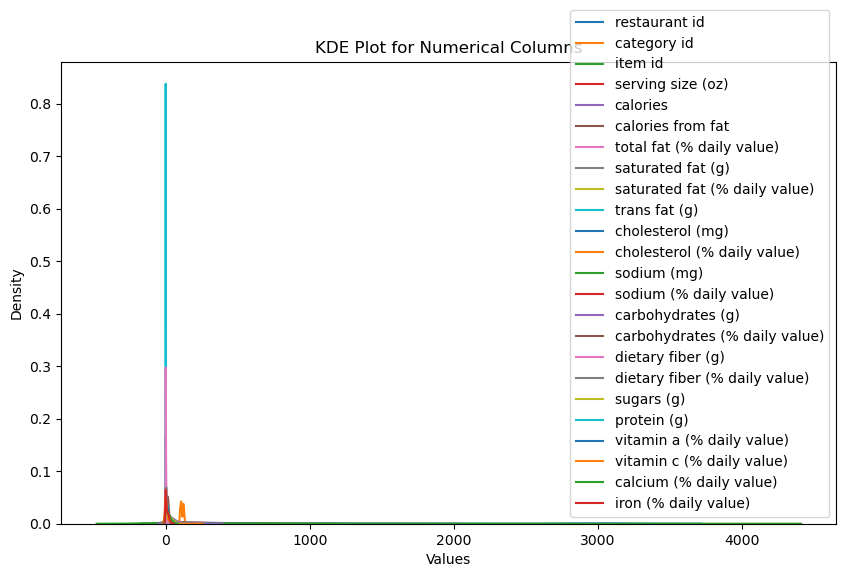

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# S ummary statistics
summary_stats = df.describe()
print(summary_stats)

# Plot KDE for all numeric columns
plt.figure(figsize=(10, 6))
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.kdeplot(df[column], label=column)

plt.title('KDE Plot for Numerical Columns')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()


7. 

In [44]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])


8.

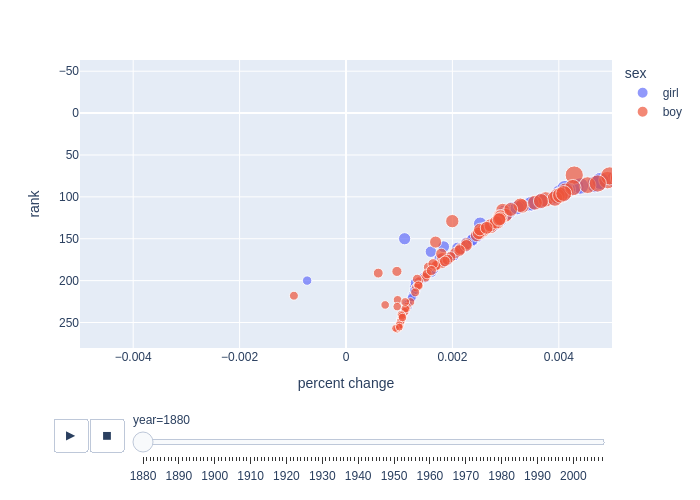

In [53]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

9. Yes, I have 